# Littlewood Polynomial

$$\sum_{k=0}^{n}a_k x^k = 0$$
$$a_k \in \left \{-1,1\right \}$$

In [1]:
import numpy as np
import mpmath as mpm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from celluloid import Camera
from matplotlib import animation

plt.style.use('dark_background')

In [4]:
from modules import visualize, pisot_search, poly_utils, animate

## Constants arising from Littlewood polynomials

https://en.wikipedia.org/wiki/Littlewood_polynomial

Pisot numbers and Salem numbers

In [5]:
from consts import tau, phi, psi, plastic_const, salem_const

print(f'golden ratio = {phi}')
print(f'supergolden ratio = {psi}')
print(f'plastic ratio = {plastic_const}\n')

print(f'salem constant = {salem_const}')

golden ratio = 1.618033988749895
supergolden ratio = 1.4655712318767682
plastic ratio = 1.324717957244746

salem constant = 1.17628081825992


Golden ratio ($\varphi$) $= 1.618033988 \cdots$
$$\varphi = \frac{1 + \sqrt{5}}{2}$$
$$\varphi = \sqrt{1+\sqrt{1+\sqrt{1+\cdots}}}$$
$$x^2 - x - 1 = 0$$

Supergolden ratio ($\psi$) $= 1.46557123 \cdots$
$$\psi = \frac{1}{3}\left ( 1 + \sqrt[3]{\frac{29+3\sqrt{93}}{2}} +
\sqrt[3]{\frac{29-3\sqrt{93}}{2}} \right ) $$
$$ \psi = \frac{1}{3} \left ( 1 +  2 \cosh\left ( \frac{1}{3} {\cosh}^{-1}\left ( \frac{29}{2} \right ) \right ) \right ) $$
$$\psi = \sqrt[3]{1 + \left( \sqrt[3]{1 + \left( \sqrt[3]{1 + \cdots} \right)^2} \right)^2}$$
$$x^3 - x^2 - 1 = 0$$

Plastic ratio ($\rho$) $= 1.324717957 \cdots$
$$\rho = \sqrt[3]{\frac{9 + \sqrt{69}}{18}} +
\sqrt[3]{\frac{9 - \sqrt{69}}{18}} $$
$$\rho = \sqrt[3]{1+\sqrt[3]{1+\sqrt[3]{1+\cdots}}}$$
$$x^3 - x - 1 = 0$$

Smallest known Salem number ($\sigma_1$) $= 1.1762808182 \cdots$
$$x^{10} + x^9 - x^7 - x^6 - x^5 - x^4 - x^3 + x + 1 = 0$$


# Pisot numbers

https://en.wikipedia.org/wiki/Pisot-Vijayaraghavan_number

Not all pisot numbers are formed using littlewood polynomials.

For example, \
Root of: $x^6 - 2x^5 + x^4 - x^2 + x - 1$

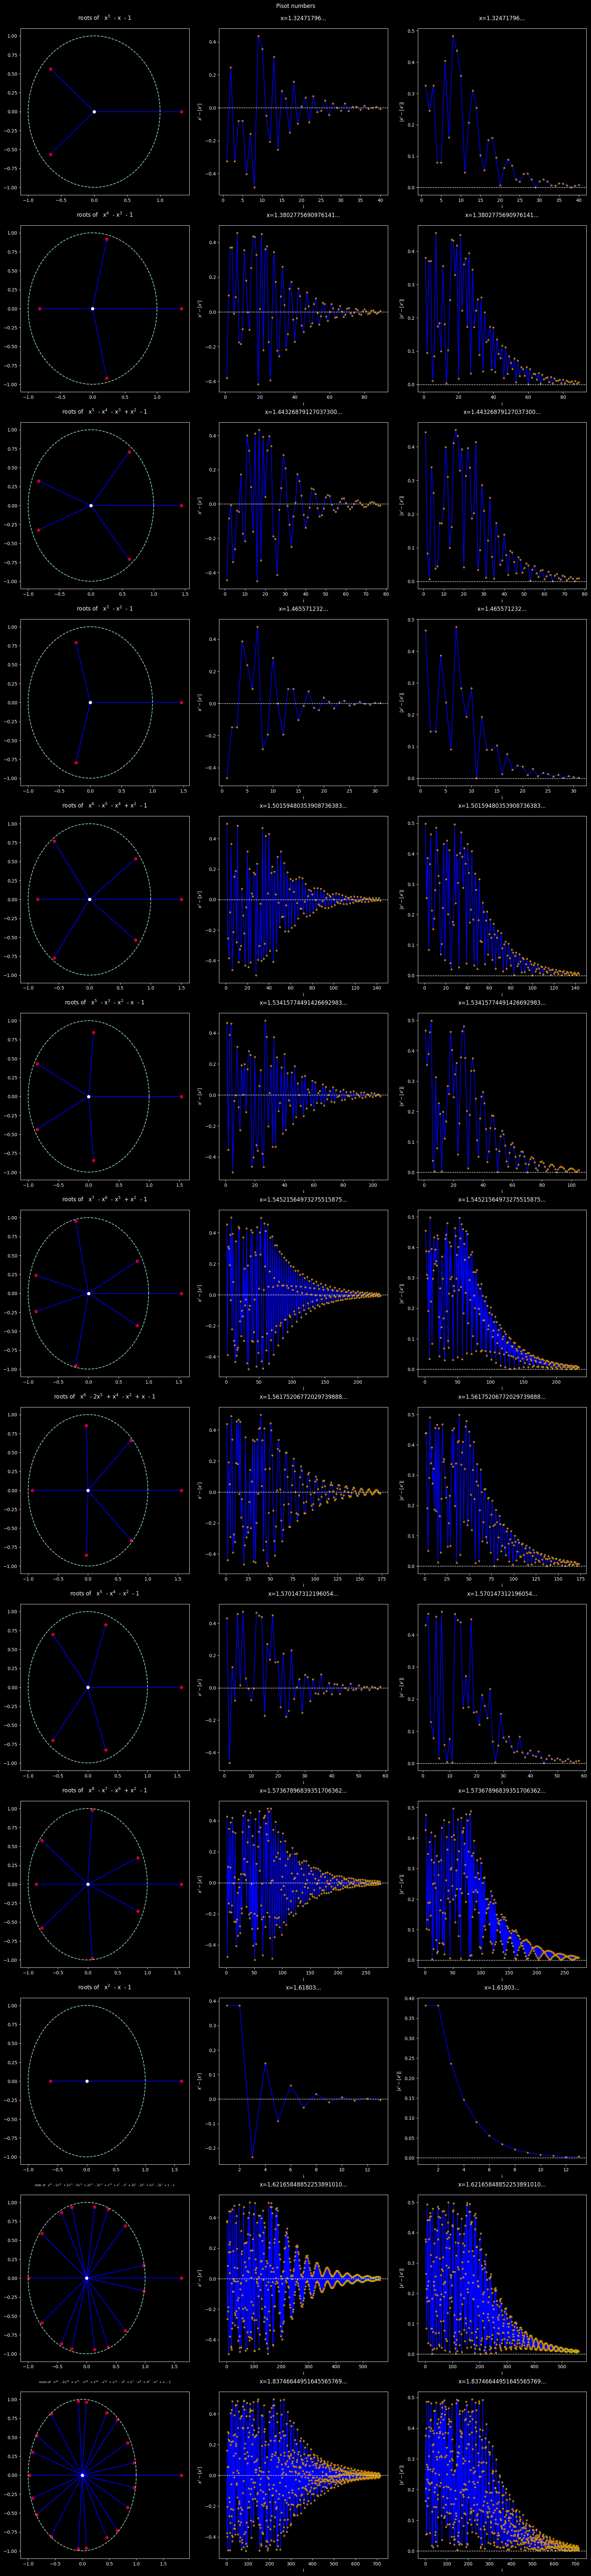

In [6]:
from consts import pisot_poly_coeffs
n_poly = len(pisot_poly_coeffs)

N_digits = [8, 15, 16, 8, 29, 23, 48, 37, 14, 59, 5, 123, 193]

fig, axs = plt.subplots(n_poly, 3, figsize=(18, 6*n_poly))
for i, (coeffs, n_digits) in enumerate(zip(pisot_poly_coeffs, N_digits)):
  visualize.plot_poly_convergence(coeffs, n_digits, axs[i])

plt.suptitle('Pisot numbers', y=0.999)
plt.tight_layout()

### Explanation for the observed exponential decaying cosines

Let $S$ be the sum of $n^{th}$ powers of roots of the polynomial, \
$S_n = z_0^n + z_1^n + z_2^n + \cdots$

By the properties of [symmetric polynomials](https://en.wikipedia.org/wiki/Symmetric_polynomial) and [Newton's Identities](https://en.wikipedia.org/wiki/Newton%27s_identities#Expressing_power_sums_in_terms_of_elementary_symmetric_polynomials) we know that $S_n$ will always be an integer. <br>
<br>

Let $z_0$ be the purely real root outside of the unit circle. \
And since the polyomial is symmetric, the conjugates of all other roots would also be roots of the same polynomial. Assuming an odd polynomial, \
$S_n = r_0^n + (z_1^n + \overline{z_1}^n) + (z_2^n + \overline{z_2}^n) + \cdots$ \
 \
Since $z^n$ is a holomorphic function, so $z_1^n + \overline{z_1}^n = 2\Re(z^n) $. Hence \
$S_n = r_0^n + 2\Re(z_1^n) + 2\Re(z_2^n) + \cdots$ \
 \
$z$ can be expressed as $re^{i\theta}$, where \
$r = |z|$ and $\theta = \tan_2^{-1}(\Im(z),\Re(z))$ \
$\implies z^n = (re^{i\theta})^n = r^ne^{in\theta} = r^n(\cos(n\theta)+i\sin(n\theta)) $ \
 \
$S_n = r_0^n + 2r_1^n\cos(n\theta_1) + 2r_2^n\cos(n\theta_2) + \cdots$ \
$S_n = r_0^n + 2(r_1^n\cos(n\theta_1) + r_2^n\cos(n\theta_2) + \cdots$) \
 \
And if it is an even polynomial, we would have two real roots with opposite signs. \
$S_n = r_0^n + r_1^n + 2(r_2^n\cos(n\theta_2) + r_3^n\cos(n\theta_3) + \cdots$) \
 \
The magnitude of all complex roots is less than 1, so $z^n$ would give a shrinking spiral. \
And $r^n$ would give a decaying exponential. \
And the real part of the shrinking spiral, $r^n\cos(n\theta)$, would give an exponential decaying cosine. \
 \
The distance from nearest integer approaches the sum of these exponential decaying cosines. \
$[r_0^n] \approx \sum_{k=0}^{n_{roots}}z_k^n$ \
Let $z_0$ denote the purely real root outside of the unit circle,
$z_0 = r_0 + 0i$ \
$[r_0^n] \approx r_0^n + \sum_{k=1}^{n_{roots}}z_k^n$
$$[r_0^n] - r_0^n \approx + \sum_{k=1}^{n_{roots}}z_k^n$$

In [7]:
first_poly = pisot_poly_coeffs[4]
mpm.mp.dps = 150
roots = mpm.polyroots(first_poly)
real_pos_roots = [root.real for root in roots if root.imag == 0
                  and root.real > 0]
max_root = max(real_pos_roots)
print(float(max_root))

roots.remove(max_root)
roots = np.array(roots, dtype=complex)
n_pows = poly_utils.check_convergence(max_root)

1.5015948035390874


In [8]:
paired_roots = roots[roots.imag!=0]  # All complex roots are paired.
other_single_root = roots[roots.imag==0]  # Would be empty for an odd polynomial.
paired_single_roots = [*other_single_root]
for root in paired_roots:
  if root.real not in np.array(paired_single_roots).real:
    paired_single_roots.append(root)

paired_single_roots = sorted(paired_single_roots, key=lambda x: abs(x))

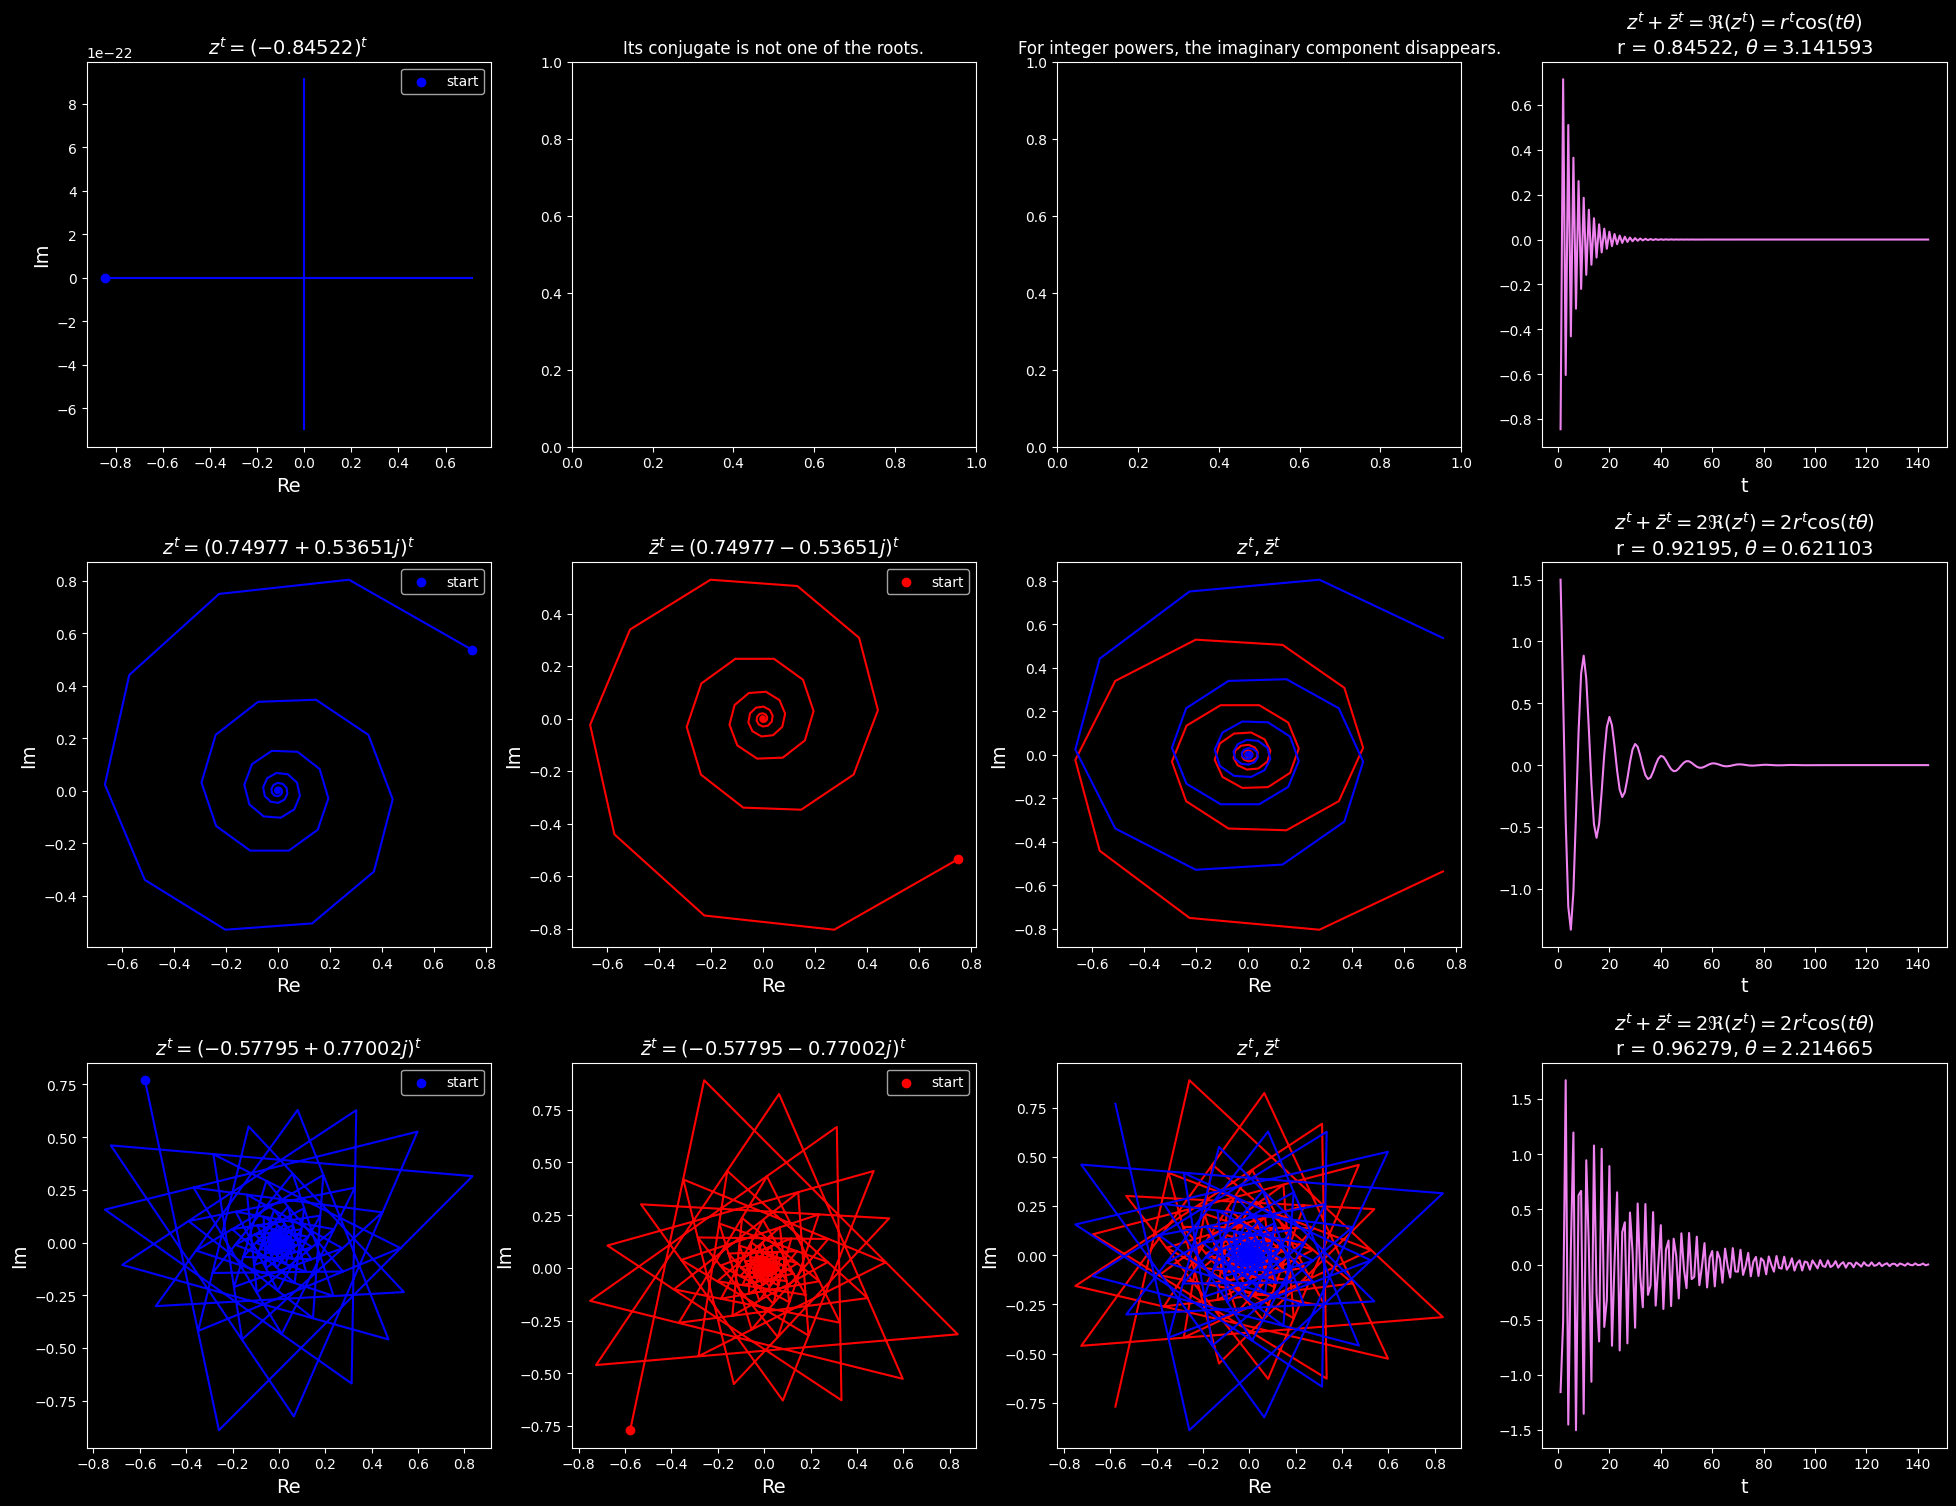

In [24]:
n_pows = poly_utils.check_convergence(max_root)
pows = np.linspace(1,n_pows, n_pows)  # Could use other values for 3rd arg.
visualize.plot_roots_spirals(paired_single_roots, pows)

Summing up the decaying cosines in the last column above gives you the curve you see below. \
It would be mostly dominated by the last row in the above plot since, all other powers decay relatively quicker.

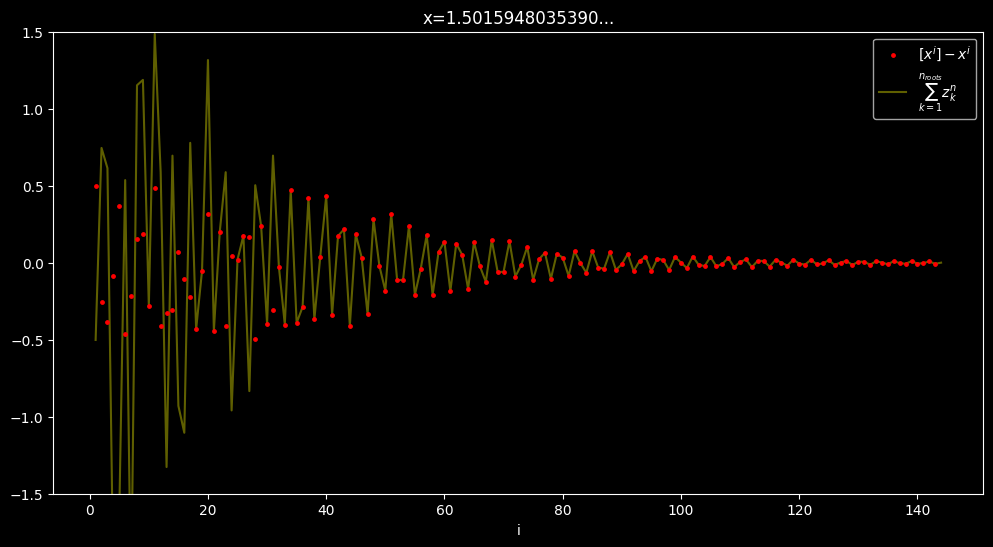

In [25]:
fig, axs = plt.subplots(figsize=(12,6))

pows_int = np.arange(1, n_pows)
root_pows = max_root**pows_int
nint_dists = np.array(list(map(mpm.nint,root_pows))) - root_pows
plt.scatter(pows_int, nint_dists, c='r', s=6, zorder=3, label='$[x^i] - x^i$')
# plt.plot(pows_int, nint_dists, c='b')
plt.xlabel('i')

pows = np.linspace(1,n_pows, n_pows)  # Could use other values for 3rd arg.
roots_sum = (roots[:,None]**pows).sum(axis=0)
plt.plot(pows, roots_sum.real, c='y', alpha=0.5, label='$\sum_{k=1}^{n_{roots}}z_k^n$')

plt.ylim(-1.5, 1.5)
plt.title(f'x={str(max_root)[:15]}...')
plt.legend()
plt.show()

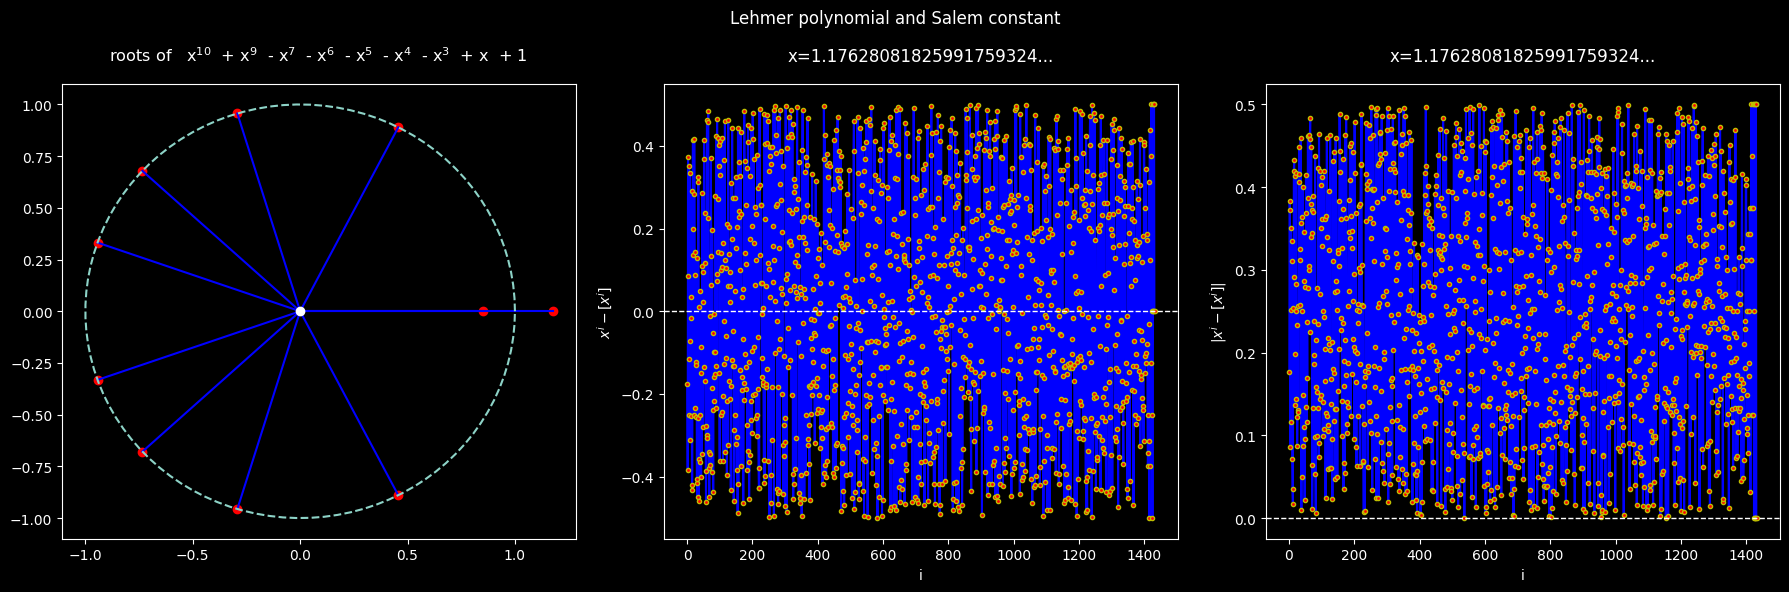

In [9]:
# Powers of Salem numbers dont result in approximate integers.
# Plot shows last few values to be going to 0 because of loss of precision.

from consts import lehmer_poly_coeffs
n_digits = 100

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
visualize.plot_poly_convergence(lehmer_poly_coeffs, n_digits, axs, convergence_params={'limit':2000})
plt.suptitle('Lehmer polynomial and Salem constant')
plt.tight_layout()

## Check for PV numbers uing their property.

A real algebraic integer greater than 1, all of whose Galois conjugates are less than 1 in absolute value.

In [ ]:
pisot_poly_coeffs_data = poly_utils.get_pisot_coeffs_data(max_degree=10)


print(f'{len(pisot_poly_coeffs_data)} PV numbers found')
# Sort based on values.
pisot_poly_coeffs_data = dict(sorted(pisot_poly_coeffs_data.items(), key=lambda item: item[1]))

# Filter out roots less than a specific value.
# pisot_poly_coeffs_data = {coeffs: max_root for coeffs, max_root in pisot_poly_coeffs_data.items() if max_root<=phi}
# print(f'{len(pisot_poly_coeffs_data)} after filtering')

  0%|          | 0/13122 [00:00<?, ?it/s]

67 PV numbers found


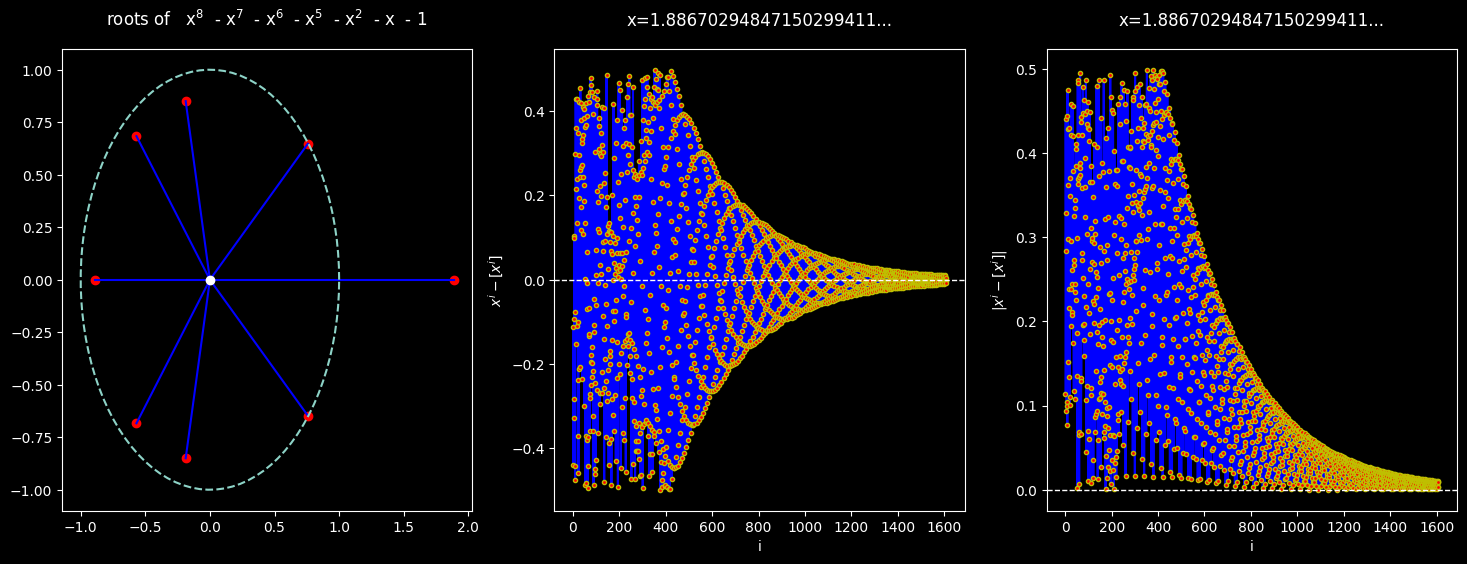

In [ ]:
import random

coeffs = list(pisot_poly_coeffs_data.keys())[44]
# coeffs = random.choice(list(pisot_poly_coeffs_data.keys()))
n_digits = 500

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
visualize.plot_poly_convergence(coeffs, n_digits, axs, convergence_params={'limit':2000})

### Animate

single number, increasing powers

In [ ]:
num = poly_utils.get_max_root(coeffs, 1600)
anim = animate.powers_animate_single(num=num, N_pows=1600)

FFwriter = animation.FFMpegWriter(fps=30)

# anim.save(f'pow_dist.gif', writer=animation.PillowWriter(fps=30))
anim.save(f'pow_dist.mp4', writer=FFwriter)

  0%|          | 0/1598 [00:00<?, ?it/s]

interpolating between two numbers

In [ ]:
coeffs_1 = [1, 0, -1, -1]
coeffs_2 = [1, -1, 0, -1]
anim = animate.interp_animate(coeffs_1=coeffs_1, coeffs_2=coeffs_2, n_digits=50)

FFwriter = animation.FFMpegWriter(fps=10)

# anim.save(f'sig_interp.gif', writer=animation.PillowWriter(fps=10))
anim.save(f'sig_interp.mp4', writer=FFwriter)

## Trying to find Pisont numbers using brute force

In [ ]:
from scipy import signal
# Adjust prominence to vary the number of peaks fonud.

### Using numpy

Very fast but not memory efficient.

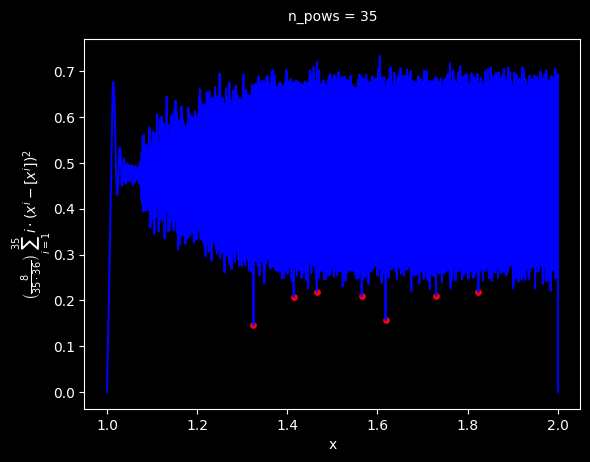

1.324718 ^ 35 = 18807.034059246267
1.4142136 ^ 35 = 185363.9726616237
1.4655711999999999 ^ 35 = 646014.5095634616
1.5650722 ^ 35 = 6437291.9112424655
1.618034 ^ 35 = 20633244.02116449
1.7298329 ^ 35 = 213867772.97501987
1.8236615 ^ 35 = 1358463699.0570033


In [ ]:
n_digits, n_pows = 7, 35
x, y_errs = pisot_search.get_nint_errs_numpy(n_digits, n_pows)
dips, _ = signal.find_peaks(-y_errs, prominence=0.49)
visualize.plot_nint_errs(x, y_errs, n_pows, dips)
plt.show()

for dip in dips:
  print(f'{x[dip]} ^ {n_pows} = {x[dip]**n_pows}')

#### Animate the evolution of distance to nearest integer curve.

In [ ]:
anim = animate.powers_animate(n_digits=6, n_pows=30)
anim.save(f'power_err.gif', writer=animation.PillowWriter(fps=2))

  0%|          | 0/29 [00:00<?, ?it/s]

### Using numba


Fast and doesnt consume very large memory.

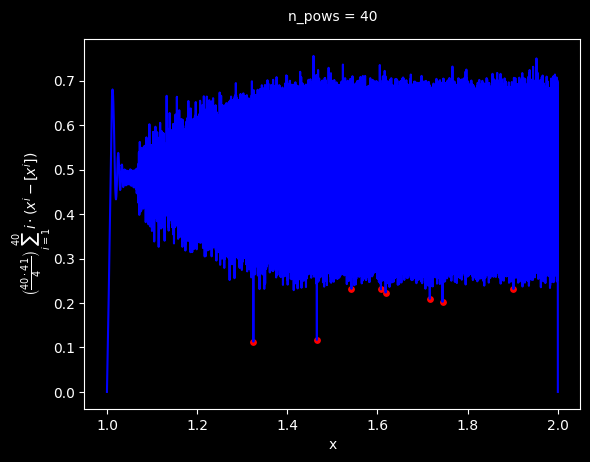

In [ ]:
n_digits, n_pows = 8, 40
x, y_errs = pisot_search.get_nint_errs_numba(n_digits, n_pows)
dips, _ = signal.find_peaks(-y_errs, prominence=0.49)
visualize.plot_nint_errs(x, y_errs, n_pows, dips)
plt.show()

# for dip in dips:
#   print(f'{x[dip]} ^ {n_pows} = {x[dip]**n_pows}')

In [ ]:
for dip in dips:
  print(f'{x[dip]} ^ {n_pows} = {x[dip]**n_pows}')

1.32471796 ^ 40 = 76725.0135516101
1.4655712300000001 ^ 40 = 4367945.775861002
1.54218972 ^ 40 = 33536068.98474244
1.6076050899999998 ^ 40 = 176674920.03597167
1.61803399 ^ 40 = 228826134.07171133
1.7159639 ^ 40 = 2400633605.9521446
1.7442095100000001 ^ 40 = 4612602213.106492
1.90148563 ^ 40 = 145788043449.2357


### Using mpmath

##### Evaluating random floats.

In [ ]:
num_range = plastic_const, phi
top_n, n_digits = 5, 20
top_n = pisot_search.random_search_mpm(num_range, n_digits=n_digits, top_n=top_n,
                                       min_apart=0.05, min_near=0.01)

100.0% checked
{mpf('1.3448007019217178175505'): mpf('0.2994492112881967335851'),
 mpf('1.4346724240937467757618'): mpf('0.30612022158967732962809'),
 mpf('1.5036567084353574961384'): mpf('0.31695246094484390030662'),
 mpf('1.5304574920023727171632'): mpf('0.32817254193276182761915'),
 mpf('1.6151036650133701082038'): mpf('0.32287943819109697877706')}


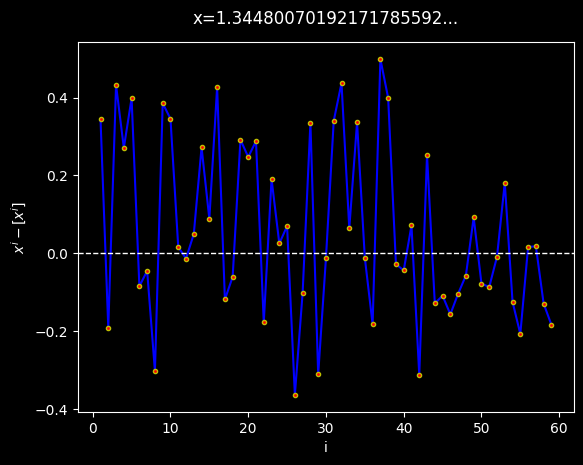

In [ ]:
x = min(top_n, key=top_n.get)
visualize.plot_approximation_error_1(x, n_digits*3)

### Trying to find Pisot numbers using pyGAD

  0%|          | 0/20000 [00:00<?, ?it/s]

Parameters of the best solution : [2 2 8 2 9 9 3 4 7 0 3 4 7 0 6 1 3 7 9 6]
Fitness value of the best solution = 3.3949162308856433


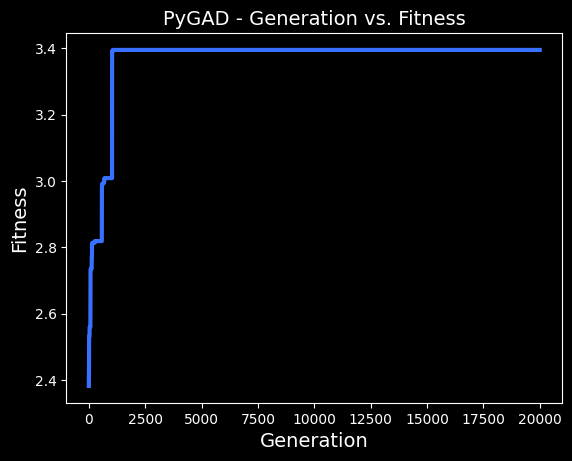

In [ ]:
n_digits, num_generations = 20, 20000

num = pisot_search.guided_search(n_digits, num_generations)

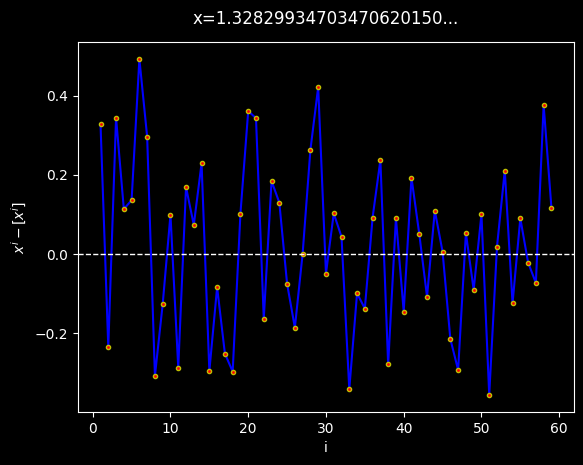

In [ ]:
visualize.plot_approximation_error_1(num, n_digits*3)

### Trying to find Pisot numbers using gradient descent

nint_dist$(x) = [x] - x $

$ \frac{d}{dx} $ nint_dist$(x) = -1 $, not defined at half-integers \
 \

nint_dist_appr$(x) = \frac{2}{\tau} \sum_{k=1}^{\infty} \frac{(-1)^k \sin(\tau k x)}{k} $

$ \frac{d}{dx} $ nint_dist_appr$(x) = 2 \sum_{k=1}^{\infty} (-1)^k \cos(\tau k x) $ \
\
\
$loss(x)$ = $ \frac{1}{2} \sum_{i=1}^{n} i \cdot $ nint_dist$(x^i)^2$

$\frac{d}{dx}loss(x)$ = $ \sum_{i=1}^{n} (i \cdot $ nint_dist$(x^i)) (\frac{d}{dx}$nint_dist$(x^i)(\frac{d}{dx}(x^i))$

$ = \sum_{i=1}^{n} (i \cdot $ nint_dist$(x^i)) (\frac{d}{dx}$nint_dist$(x^i)(i\cdot x^{i-1})$

$ = \sum_{i=1}^{n} i^2 \cdot x^{i-1} \cdot $ nint_dist$(x^i) \cdot \frac{d}{dx} $nint_dist$(x^i)$ \
 \
 \
Update rule \
$x_{n+1} = x_n - \lambda\frac{d}{dx}loss(x)$

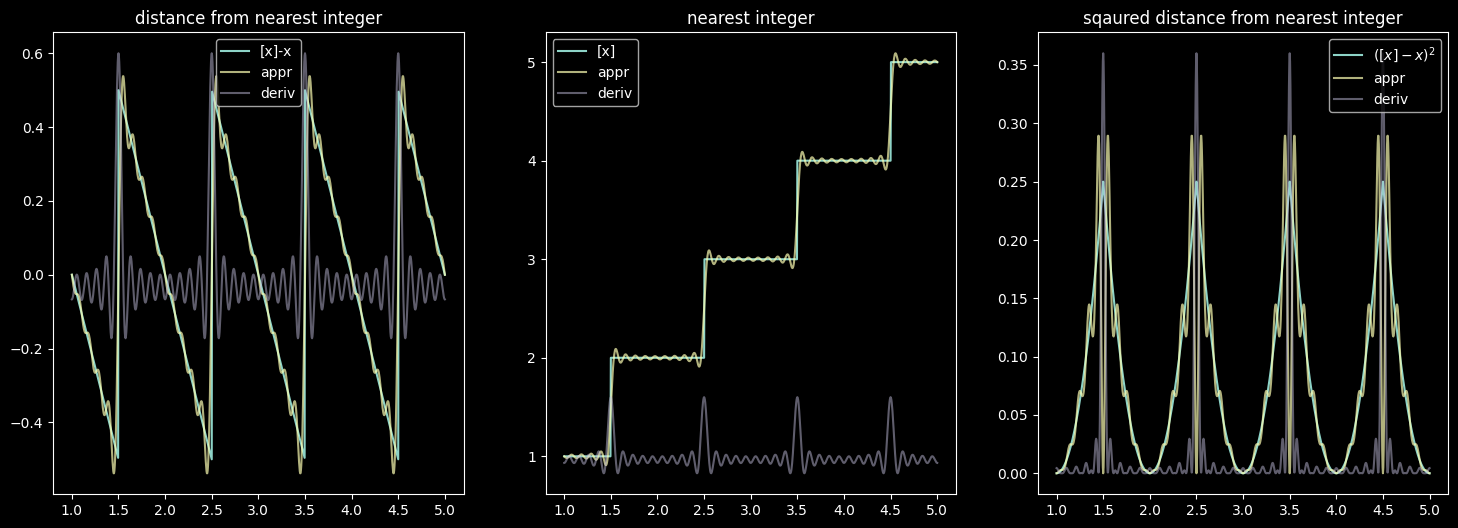

In [7]:
x = np.linspace(1,5,1001)
visualize.plot_err_fourier(x)

In [8]:
deriv_func = lambda x: pisot_search.loss_deriv(x, 30)
steps = pisot_search.grad_desc(x=1.62, lr=1e-12, deriv_func=deriv_func, n_iters=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

not converging

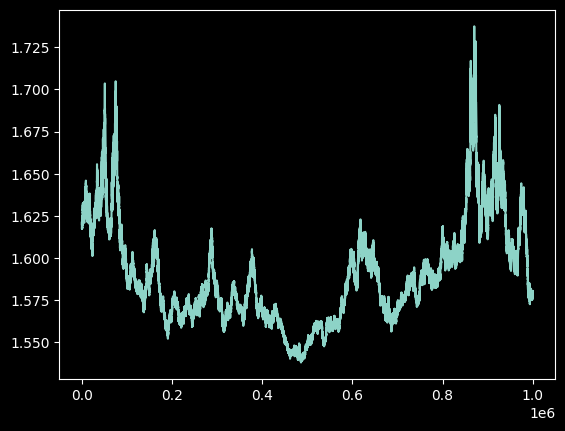

In [9]:
plt.plot(steps)
plt.show()